In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_3car_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..3-Carene
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42967,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
74996,42970,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
74997,42972,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
74998,42974,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..3-Carene', 'index'], axis = 1)
y = df_knn[['X..3-Carene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

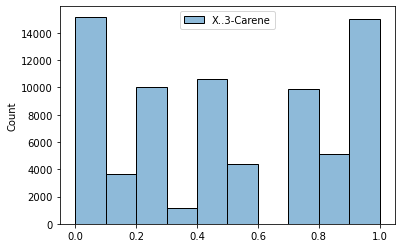

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.04232622222222219

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9403530893299737

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.9053508415716669

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([8.40416055e-04, 4.01007067e-04, 3.11462044e-03, 8.68537318e-04,
       8.22695887e-04, 1.49247970e-03, 1.16412266e-03, 1.29625910e-03,
       2.69093151e-04, 4.47218174e-04, 1.40507732e-04, 2.31762278e-03,
       6.82455756e-04, 1.27562506e-03, 2.49851917e-03, 3.77422044e-04,
       2.24292748e-04, 2.62063754e-03, 2.28399269e-04, 3.45400566e-03,
       6.36144231e-04, 1.75113645e-03, 2.83980700e-03, 2.61968408e-03,
       2.93671400e-04, 8.77387522e-05, 6.34594142e-04, 2.14846709e-04,
       1.83906773e-04, 8.27206303e-04, 4.00522923e-03, 4.36005727e-04,
       6.29793270e-03, 2.56470977e-04, 1.09057249e-03, 1.31646180e-03,
       9.62590338e-04, 2.25047456e-03, 1.48070802e-04, 2.10985359e-03,
       9.76844618e-05, 4.32552393e-04, 1.15323137e-04, 2.44804678e-03,
       3.77063317e-04, 4.34662258e-04, 3.06938919e-03, 2.34095282e-03,
       1.39061695e-03, 2.91013670e-04, 2.33912827e-04, 1.36615202e-04,
       2.36136185e-04, 3.29767841e-03, 5.15335928e-04, 8.70939564e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_2,tfidf_11,tfidf_14,tfidf_17,tfidf_19,tfidf_22,tfidf_23,tfidf_30,tfidf_32,tfidf_37,...,talkative,uplifted,cheese,diesel,earthy,grape,lemon,lime,orange,vanilla
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.14162,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.14162,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.14162,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.14162,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.14162,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.407518,0.00000,...,0,1,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_2',
 'tfidf_11',
 'tfidf_14',
 'tfidf_17',
 'tfidf_19',
 'tfidf_22',
 'tfidf_23',
 'tfidf_30',
 'tfidf_32',
 'tfidf_37',
 'tfidf_43',
 'tfidf_46',
 'tfidf_47',
 'tfidf_53',
 'tfidf_69',
 'tfidf_73',
 'tfidf_89',
 'tfidf_93',
 'tfidf_95',
 'tfidf_101',
 'tfidf_117',
 'tfidf_121',
 'tfidf_128',
 'tfidf_129',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_146',
 'tfidf_149',
 'tfidf_152',
 'tfidf_158',
 'tfidf_160',
 'tfidf_161',
 'tfidf_162',
 'tfidf_168',
 'tfidf_173',
 'tfidf_175',
 'tfidf_178',
 'tfidf_187',
 'tfidf_189',
 'tfidf_195',
 'tfidf_199',
 'tfidf_203',
 'tfidf_207',
 'tfidf_210',
 'tfidf_215',
 'tfidf_216',
 'tfidf_221',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_258',
 'tfidf_267',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_304',
 'tfidf_308',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_320',
 'tfidf_329',
 'tfidf_337',
 'tfidf_340',
 'tfidf_345',
 'tfidf_353',
 'tfidf_358',
 'tfidf_362',
 'tfidf_366',
 'tfidf_367',
 'tfidf_371',
 'tfidf_376'

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_3car.pkl")
joblib.dump(selector, "selector_knn_tfidf_3car.pkl")

['selector_knn_tfidf_3car.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.03972416666666662

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.011254182407407394

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.10608573140346157

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9442923750168146

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.9110923454077804

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.021400799481171608

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.007177757111138881

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.08472164487979965

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9945461056526177

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9432959652791877

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_3car.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_3car.pkl")

['y_test_knreg_tfidf_3car.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.024132771690086534

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.9329258117438801

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.008676672884825475

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.09314866013435445

In [47]:
y_test

,X..3-Carene
11591,1.000000
52020,0.000000
34666,0.800000
22169,0.466667
23049,0.466667
...,...
60863,0.000000
32316,0.800000
60933,0.000000
43206,0.700000


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

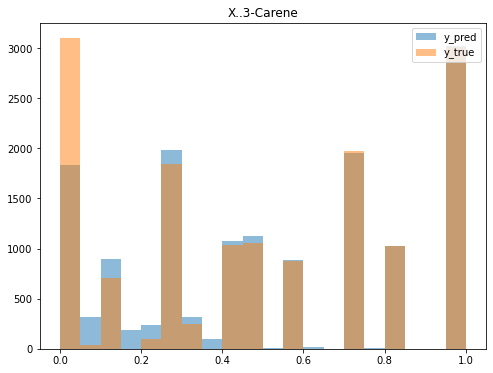

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..3-Carene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_3car.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.968
P-value: 0.000


<AxesSubplot:>

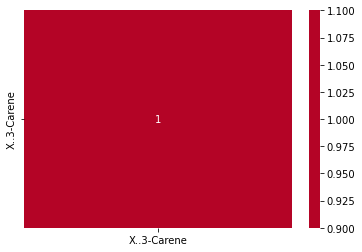

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)